In [1]:
from parameters import *
from functions import *
from PDE_solutions import *

walks = 10000
dt =T/200
print(X0)
print(PDEProb)

[0, 3]
6.293701166092087e-05


In [2]:
R_in = np.sqrt(X0[0]**2 + X0[1]**2)
R_f = R

m = 14

R_list = np.linspace(R_in,R_f,m)

N_list = np.ones(m-1) * 2
N_list[0] = 15
N_list[1] = 13
N_list[2] = 10
N_list[3] = 7
N_list[4] = 5

# Splitting method

Checking dimensionality of H, Ns and Y.
Radiuses: [3.    2.846 2.692 2.538 2.385 2.231 2.077 1.923 1.769 1.615 1.462 1.308
 1.154 1.   ]
Walks per stage: [15. 13. 10.  7.  5.  2.  2.  2.  2.  2.  2.  2.  2.]
Timestep: 0.01


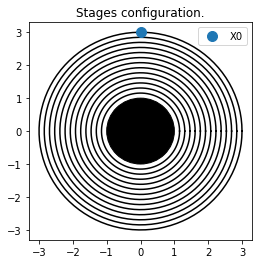


Splitting method starts...
Splitting method results:
	Estimated probability: 4.366987179487179e-05
	Estimated variance: 1.8589700383886001e-06
PDE result is:  6.293701166092087e-05


In [3]:
np.random.seed(SEED) #scipy is based on the numpy seed
H = np.zeros(R_list.shape[0]-1) #hits
Y = np.zeros(int(N_list[0]))
Y_SM, H_SM = SplittingMethod(X0, 0., 0.01, N_list, R_list, Y, H, 0, np.nan)
print('\n\n')
if H_SM is not np.nan:
    mean_SM, std = ComputeEstimatesSplittingMethod(Y_SM, N_list, PDEProb = PDEProb)

# Splitting method with balanced growth

Splitting method with balanced growth.

Radiuses: [3.    2.846 2.692 2.538 2.385 2.231 2.077 1.923 1.769 1.615 1.462 1.308
 1.154 1.   ]
Timestep: 0.01


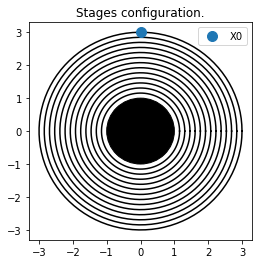


Pilot run with walks per stage:  [15. 13. 10.  7.  5.  2.  2.  2.  2.  2.  2.  2.  2.]
Pilot run starts...
Pilot run terminated.
Pilot run results: 
		H = [   7.   63.  376. 1545. 4192. 4290. 4362. 4265. 3850. 3321. 2776. 2212.
 1660.]
		p_i = [0.467 0.692 0.597 0.587 0.543 0.512 0.508 0.489 0.451 0.431 0.418 0.398
 0.375] 
		N = [3 2 2 2 2 2 2 3 3 3 3 3 3]

Calling the splitting method.



Splitting method results:
	Estimated probability: 0.0
	Estimated variance: 0.0
PDE result is:  6.293701166092087e-05


In [4]:
Y_SM, H_SM, N_SM = SplittingMethodBalancedGrowth(X0, 0.01, R_list, N_list, T = 1, verbose = 1, seed = SEED)
print('\n\n')
if H is not np.nan:
    mean_SM_BG, std = ComputeEstimatesSplittingMethod(Y_SM, N_SM, PDEProb)

# Error comparison

In [5]:
print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)
print('Splitting method (balanced growth) relative error: ', np.abs(PDEProb - mean_SM_BG)/PDEProb)

Splitting method (basic version) relative error:    0.30613369395186135
Splitting method (balanced growth) relative error:  1.0
